# Project: DaXiGua Agency

In [1]:
from State import State
from Movement_evaluation import evaluate_by_gravity
import numpy as np
import random
import time
from Ball import Ball
from Config import *
from Game import Game

## Test the movement evaluation

运动规则如下：

1. 所有球受重力影响下坠
2. 与墙壁和地板的碰撞无反弹
3. 有空气阻力，小球下落速度越大阻力越大
4. 所有球之间的碰撞有一定的速度损失，并非完全弹性碰撞
5. 两个同样大小的小球相撞后合成新的小球，新的小球半径增大50% （这一条需根据具体游戏规则再进行修改）

In [2]:
state_test_1 = State(screen_x, 
                     screen_y, 
                     [Ball(np.array([200, 555]), np.array([-10, -10.0]), ball_level = 1), 
                      Ball(np.array([100, 60]), np.array([20, 0]), ball_level = 2),
                      Ball(np.array([200, 60]), np.array([0, 0]), ball_level = 1),
                      Ball(np.array([300, 200]), np.array([0, 0]), ball_level = 0)],
                     end_line)

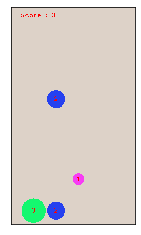

In [3]:
state_test_1.plot_state(is_plt=True)

In [4]:
state_test_1.vectorize(10)

array([  0., 200., 555.,  40., 300., 200.,  26., 100.,  60.,  54., 200.,
        60.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

### Initial State
<img src = "figures/sample_2.jpg" width="200"/>

In [5]:
state_test_1, obtained_score = evaluate_by_gravity(state_test_1, plot=False, verbose = True)
print(obtained_score)

Remove a cherry, obtain 2 score
Remove a orange, obtain 3 score
5


In [6]:
state_test_1.plot_state()

### State after evaluation
<img src = "figures/sample_2_res.jpg" width="200"/>

## Test game

In [7]:
game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)

In [8]:
# the inital state of the game
game.current_state.plot_state()

### Step 0
<img src = "figures/sample_game_step0.jpg" width="200"/>

In [9]:
# We drop the ball from the middle of the screen
action = screen_x/2
next_state, reward, is_finish = game.next_step(action)

In [10]:
next_state.plot_state()

### Step 1
The green ball drops to the bottom, and a new blue ball is added
<img src = "figures/sample_game_step1.jpg" width="200"/>

# Test Environment with a Random Agent

In [18]:
class Random_Agent(object):
        
    def get_action(self, state):
        
        return random.randint(0, int(state.screen_x))

In [19]:
def play_one_episode(game, agent, plot = False):
    is_finish = False
    current_state = game.init_state()
    reward_recorder = []
    step = 1

    while not is_finish:
        action = agent.get_action(current_state)
        next_state, reward, is_finish = game.next_step(action, verbose = False)
        if plot:
            next_state.plot_state()
        reward_recorder.append(reward)
        current_state = next_state
    
    return reward_recorder[-1], reward_recorder, game.current_reward

In [20]:
start_time = time.time()
game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
random_agent = Random_Agent()
play_one_episode(game, random_agent)
end_time = time.time()
print("Used ", end_time-start_time, "s.")

The game is finish, final score is 452
Used  101.66398859024048 s.


In [8]:
game.current_state.plot_state()

In [21]:
random_agent = Random_Agent()

final_rewards = [] # sum of the score at each step
scores = []

start_time = time.time()
for i in range(10):
    game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
    R, _, score = play_one_episode(game, random_agent)
    print(i, "\t th episode: ", R)
    final_rewards.append(R)
    scores.append(score)
end_time = time.time()

print( (end_time - start_time)//60 )

The game is finish, final score is 497
0 	 th episode:  497
The game is finish, final score is 568
1 	 th episode:  568
The game is finish, final score is 372
2 	 th episode:  372
The game is finish, final score is 315
3 	 th episode:  315
The game is finish, final score is 516
4 	 th episode:  516
The game is finish, final score is 369
5 	 th episode:  369
The game is finish, final score is 573
6 	 th episode:  573


KeyboardInterrupt: 

In [ ]:
game.current_state

In [12]:
from matplotlib import pyplot as plt

(array([1., 0., 1., 0., 0., 6., 0., 9., 0., 3.]),
 array([ 84. ,  98.9, 113.8, 128.7, 143.6, 158.5, 173.4, 188.3, 203.2,
        218.1, 233. ]),
 <a list of 10 Patch objects>)

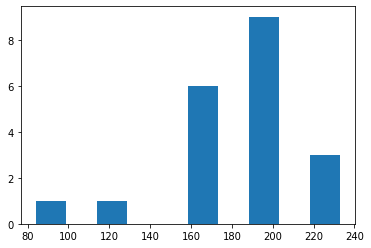

In [13]:
plt.hist(final_rewards)

# Imitate Learning

In [2]:
N_feature = 10
N_sample = 1000
X_train = np.zeros( (N_sample, 3 * N_feature + 1) )
Y_train = np.zeros( N_sample )
current_row = 0

In [15]:
def manual_play_one_episode():
    game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
    is_finish = False
    current_state = game.init_state()
    reward_recorder = []
    step = 1
    global current_row

    while not is_finish:
        current_state.plot_state(is_plt=True)
        action = int(current_state.screen_x * float(input("give your choice: ")))
        next_state, reward, is_finish = game.next_step(action, verbose = False)
        X_train[current_row, :] = current_state.vectorize(N_feature)
        Y_train[current_row] = action
        current_row += 1
        current_state = next_state
        reward_recorder.append(reward)
    return reward_recorder[-1], reward_recorder, game.current_reward

In [16]:
current_row

148

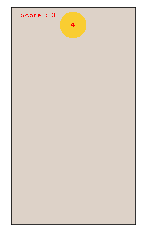

give your choice: 0.5


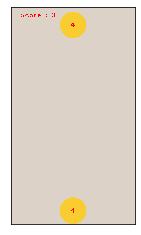

give your choice: 0.5


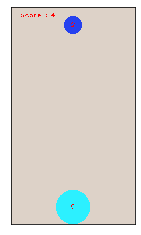

give your choice: 0.2


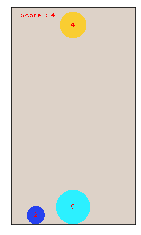

give your choice: 0.78


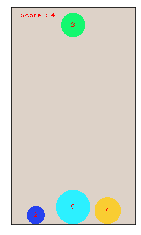

give your choice: 0.1


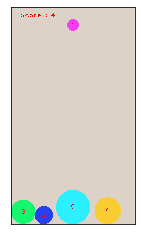

give your choice: 0.9


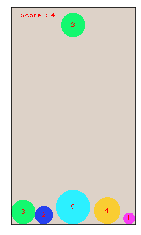

give your choice: 0.1


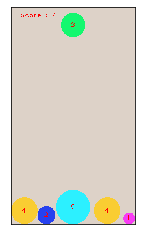

give your choice: 0.1


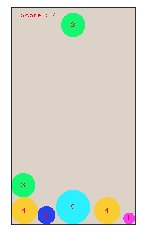

give your choice: 0.1


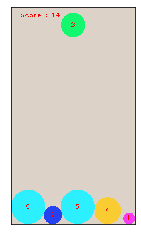

give your choice: 0.78


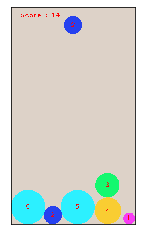

give your choice: 0.33


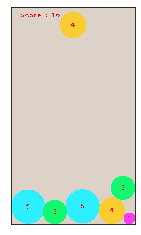

give your choice: 0.78


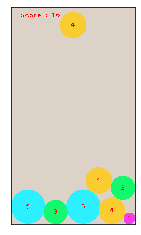

give your choice: 0.78


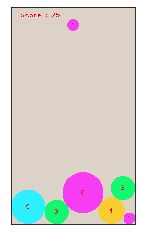

give your choice: 0.1


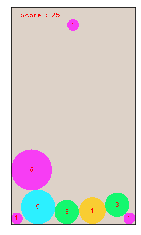

give your choice: 0.95


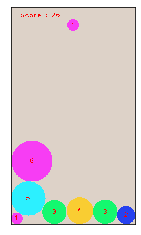

give your choice: 0.45


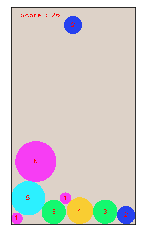

give your choice: 0.89


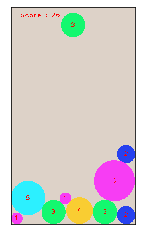

give your choice: 0.33


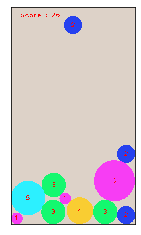

give your choice: 0.99


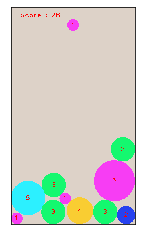

give your choice: 0.45


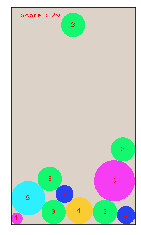

give your choice: 0.4


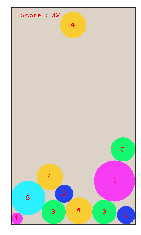

give your choice: 0.4


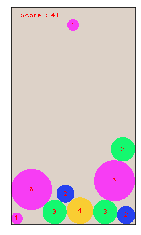

give your choice: 0.1


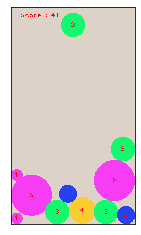

give your choice: 0.89


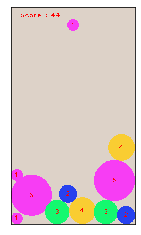

give your choice: 0.1


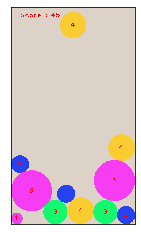

give your choice: 0.89


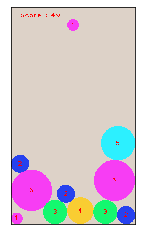

give your choice: 0.1


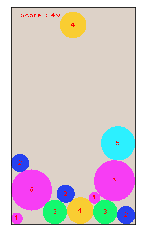

give your choice: 0.45


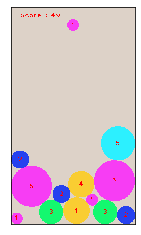

give your choice: 0.67


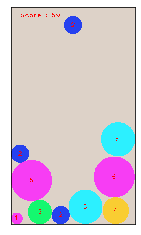

give your choice: 0.1


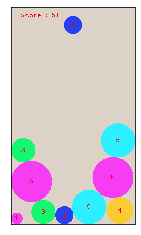

give your choice: 0.45


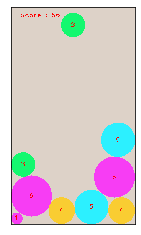

give your choice: 0.1


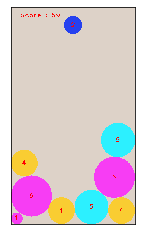

give your choice: 0.1


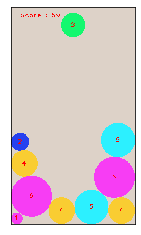

give your choice: 0.34


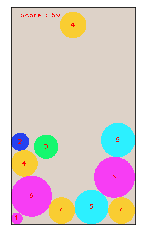

give your choice: 0.2


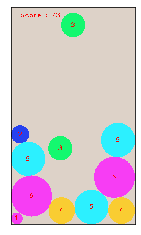

give your choice: 0.3


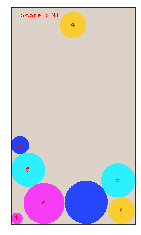

give your choice: 0.89


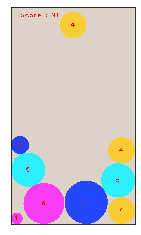

give your choice: 0.89


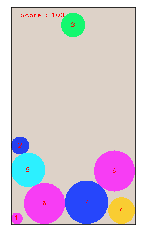

give your choice: 0.3


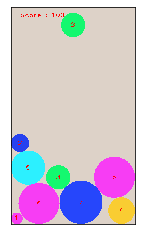

give your choice: 0.3


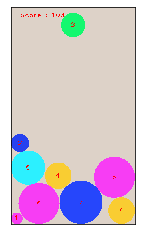

give your choice: 0.3


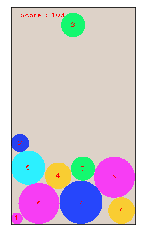

give your choice: 0.5


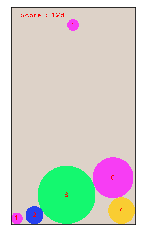

give your choice: 0.1


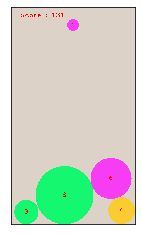

give your choice: 0.1


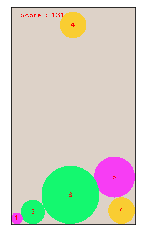

give your choice: 0.89


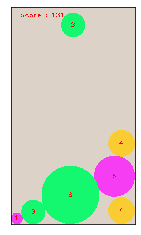

give your choice: 0.3


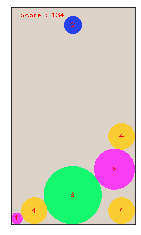

give your choice: 0.1


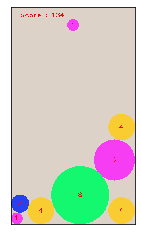

give your choice: 0.1


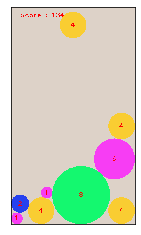

give your choice: 0.89


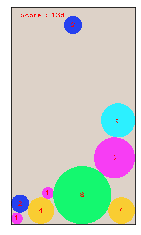

give your choice: 0.1


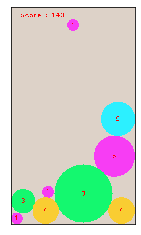

give your choice: 0.32


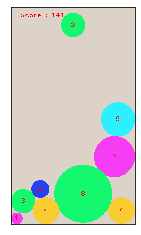

give your choice: 0.1


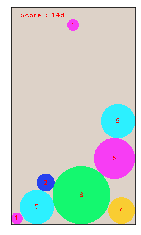

give your choice: 0.1


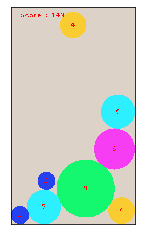

give your choice: 0.2


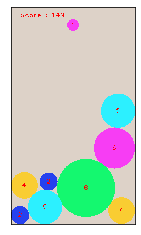

give your choice: 0.1


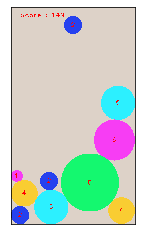

give your choice: 0.34


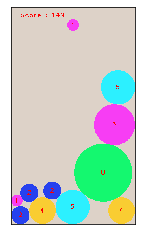

give your choice: 0.1


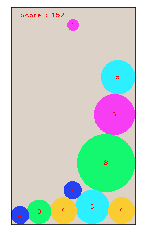

give your choice: 0.1


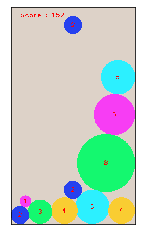

give your choice: 0.3


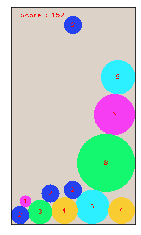

give your choice: 0.5


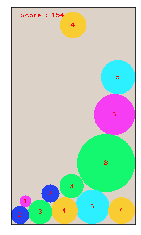

give your choice: 0.1


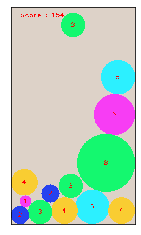

give your choice: 0.5


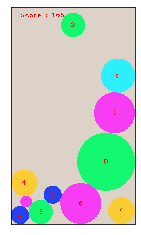

give your choice: 0.2


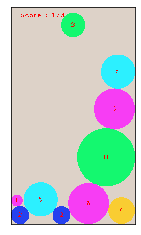

give your choice: 0.1


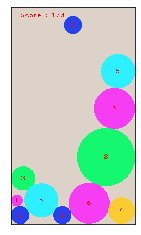

give your choice: 0.5
The game is finish, final score is 218


(218,
 [0,
  4,
  4,
  4,
  4,
  4,
  7,
  7,
  14,
  14,
  16,
  16,
  25,
  25,
  26,
  26,
  26,
  26,
  28,
  29,
  32,
  41,
  41,
  44,
  45,
  49,
  49,
  49,
  59,
  61,
  66,
  69,
  69,
  69,
  73,
  91,
  91,
  100,
  100,
  103,
  103,
  128,
  131,
  131,
  131,
  134,
  134,
  134,
  138,
  140,
  141,
  148,
  149,
  149,
  149,
  149,
  152,
  152,
  152,
  154,
  154,
  166,
  173,
  173,
  218],
 218)

In [17]:
manual_play_one_episode()